On importe les librairie essentiels

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Choix

On choisi un dataset de classification non-supervisé sur le thème de la classification de texte, pour cela nous avons choisi ce dataset :
https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset/data
Ce document comprend 2225 texte à catégoriser en 5 catégorie qui sont politique, sport, tech, amusement et business.

Ce dataset est très intéressant car il touche au domaine du NLP, la classification de texte en catégorie est très utilisé et utile par exemple : pour classifier des documents en entreprise, pour la collecte d'avis, l'analyse de sentiments, la catégorisation d'articles, et bien d'autres... 

In [12]:
df = pd.read_csv('df_file.csv')
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


Le dataset a une colonne label mais nous voulons être capable d'identifier des clusters sans celle-ci donc on la drop.

In [13]:
df.drop(['Label'], axis=1, inplace=True)

## EDA - Exploration du dataset

On compte le nombre d'entrée qui sont NaN

In [14]:
print(f"Number of nan values : \n {df.isna().sum()}")

Number of nan values : 
 Text    0
dtype: int64


Aucune valeur NaN a retiré, on continue..
On rajoute une colonne avec le nombre de charactère dans chaque texte

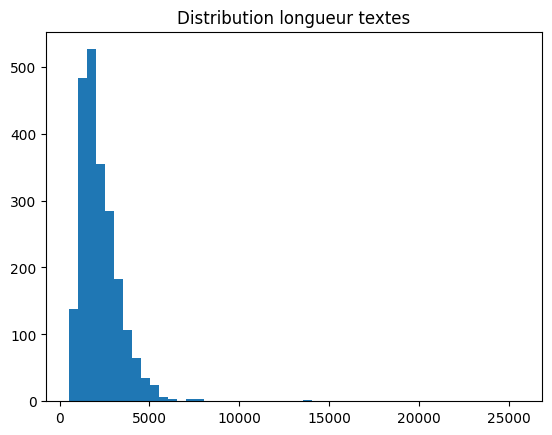

In [15]:
df['text_length'] = df['Text'].apply(len)

plt.hist(df['text_length'], bins=50)
plt.title('Distribution longueur textes')
plt.show()

## Preprocessing

In [16]:
import re
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub("[^A-Za-z]+", " ", text) # on retire les caractères spéciaux
    splited = text.split()
    tokens = [w for w in splited if not w in stopwords.words("english")]
    text = " ".join(tokens)
    return text

In [17]:
df['text_cleaned'] = df['Text'].apply(lambda text: preprocess_text(text))
df = df[df['text_cleaned'] != '']

In [18]:
df.head()

,Text,text_length,text_cleaned
0,Budget to set scene for election\n \n Gordon B...,3147,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,3026,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,3167,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,3094,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,2614,kilroy names election seat target ex chat show...


## Transformation

On est doit utiliser TfidfVectorizer pour transformers le texte en vecteur.

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(df['text_cleaned']).toarray()
# Shape of the TF-IDF matrix
print("TF-IDF matrix shape :", X_tfidf.shape)


TF-IDF matrix shape : (2225, 100)


On essaye d'effectuer un clustering sur les textes.

In [125]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)
df['cluster_label'] = kmeans.labels_

cluster_0 = df.loc[df['cluster_label'] == 0, 'Text'].tolist()
cluster_1 = df.loc[df['cluster_label'] == 1, 'Text'].tolist()
cluster_2 = df.loc[df['cluster_label'] == 2, 'Text'].tolist()
cluster_3 = df.loc[df['cluster_label'] == 3, 'Text'].tolist()
cluster_4 = df.loc[df['cluster_label'] == 4, 'Text'].tolist()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Il y'a 5 catégorie : politique, sport, tech, amusement et business.
On vérifie si les regroupement du cluster peuvent correspondre à ces catégories.

In [126]:
print("Cluster 0 : \n")
for i in range(3):
    print(i, cluster_0[i][:256])

Cluster 0 : 

0 Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, wi
1 Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for res
2 Howard denies split over ID cards
 
 Michael Howard has denied his shadow cabinet was split over its decision to back controversial Labour plans to introduce ID cards.
 
 The Tory leader said his front bench team had reached a "collective view" after holdi


Ces début d'articles semblent correpondre à la catégorie "business"..

In [119]:
print("Cluster 1 : \n")
for i in range(3):
    print(i, cluster_1[i][:256])

Cluster 1 : 

0 BBC leads interactive Bafta wins
 
 The BBC and the National Theatre have led the field at this year's Interactive Bafta awards.
 
 The National Theatre's Stagework website picked up the prize for best learning as well as top factual site. The BBC collecte
1 Hollywood to sue net film pirates
 
 The US movie industry has launched legal action to sue people who facilitate illegal film downloading.
 
 The Motion Picture Association of America wants to stop people using the program BitTorrent to swap movies. The i
2 UK pioneers digital film network
 
 The world's first digital cinema network will be established in the UK over the next 18 months.
 
 The UK Film Council has awarded a contract worth Â£11.5m to Arts Alliance Digital Cinema (AADC), who will set up the netw


Ces articles semble correspondre à "amusement"..

In [120]:
print("Cluster 2 : \n")
for i in range(3):
    print(i, cluster_2[i][:256])

Cluster 2 : 

0 'Last chance' warning for voters
 
 People in England, Scotland and Wales must have registered by 1700 GMT to be able to vote in the general election if it is held, as expected, on 5 May.
 
 Those who filled in forms last autumn should already be on the re
1 Labour targets 'hardcore truants'
 
 A fresh crackdown on persistent truants in England has been launched by Education Secretary Ruth Kelly.
 
 Serial truants make up one in 13 pupils. Previous initiatives brought 40,000 pupils back to school since 1997, a
2 Game warnings 'must be clearer'
 
 Violent video games should carry larger warnings so parents can understand what their children are playing, the trade and industry secretary has said.
 
 Patricia Hewitt is expected to call for the law banning the sale of


Ces articles sembles correspondre à "politique"..

In [121]:
print("Cluster 3 : \n")
for i in range(3):
    print(i, cluster_3[i][:256])

Cluster 3 : 

0 Sport betting rules in spotlight
 
 A group of MPs and peers has called for a tightening of regulations controlling betting on sport.
 
 The Parliamentary Group on Betting and Gaming held a substantial inquiry into betting last year. It followed fears that
1 Report attacks defence spending
 
 The Ministry of Defence has been criticised over the soaring spending costs and growing delays of its top equipment projects.
 
 A National Audit Office report on the 20 biggest projects says costs have risen by Â£1.7bn i
2 New foot and mouth action urged
 
 A senior Tory MP has criticised agriculture department Defra's "lackadaisical" approach to planning for a future foot and mouth outbreak.
 
 Public accounts committee chairman Edward Leigh was giving his reaction to a rep


Ces articles correspondent à "sport"...

In [123]:
print("Cluster 4 : \n")
for i in range(3):
    print(i, cluster_4[i][:256])

Cluster 4 : 

0 Research fears over Kelly's views
 
 Scientists have expressed concerns that new education secretary Ruth Kelly's religious views could hamper vital scientific research.
 
 Ms Kelly, who is Catholic, is reported to be "pro-life" and has opposed embryo rese
1 Hatfield executives go on trial
 
 Engineering firm Balfour Beatty and five railway managers are to go on trial for manslaughter over the Hatfield rail crash in 2000.
 
 Four people died when a section of rail broke and a high speed train derailed. Balfour
2 Tories plan migrant health checks
 
 Non-European Union citizens wanting to work in the UK will have to undergo tests for Tuberculosis and HIV, under plans unveiled by the Conservatives.
 
 A positive test for TB would mean visa applications being turned d


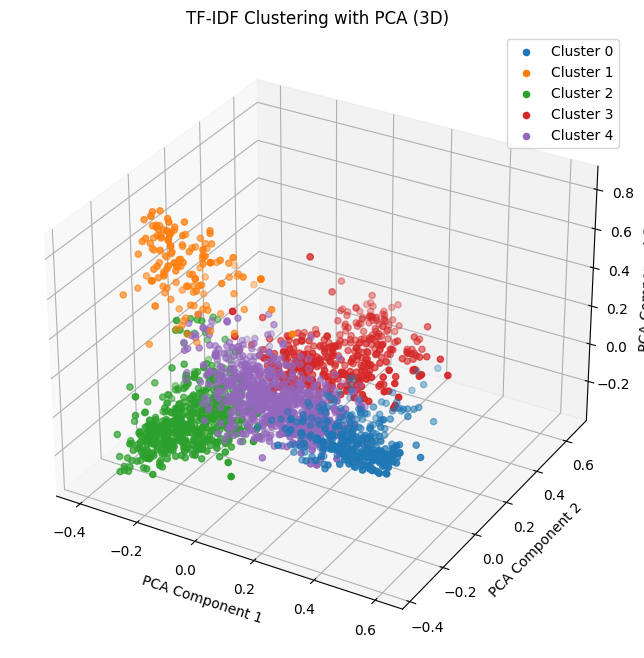

In [88]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_tfidf)

df['pca_component_1_3d'] = X_pca_3d[:, 0]
df['pca_component_2_3d'] = X_pca_3d[:, 1]
df['pca_component_3_3d'] = X_pca_3d[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in range(num_clusters):
    cluster_data = df[df['cluster_label'] == cluster_id]
    ax.scatter(cluster_data['pca_component_1_3d'], cluster_data['pca_component_2_3d'], cluster_data['pca_component_3_3d'], label=f'Cluster {cluster_id}')

ax.set_title('TF-IDF Clustering with PCA (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()
